# In-Depth : Linear Regression

# Simple Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

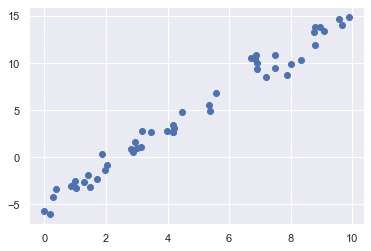

In [5]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

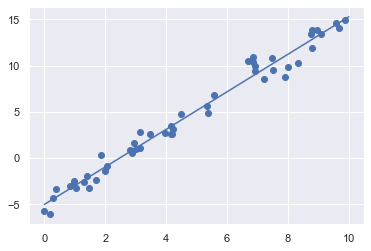

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [7]:
print('Model Slope     :', model.coef_[0])
print('Model intercept :', model.intercept_)

Model Slope     : 2.027208810360695
Model intercept : -4.998577085553202


In [8]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000064
[ 1.5 -2.   1. ]


## Basis Function Regeression

### Polynomial Basis Functions

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [10]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/anthonyesposito/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


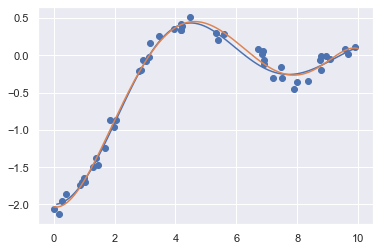

In [59]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = - 2 * (1/ x) * np.sin(x) + .1 * rng.randn(50)

x1 = np.linspace(0, 10, 100)
y1 = -2 * (1/ x1) * np.sin(x1)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x1, y1)
plt.plot(xfit, yfit)

## Gaussian Basis Functions

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N number of gaussian centers
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)        

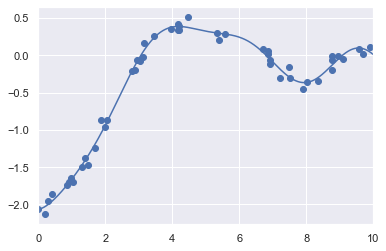

In [32]:
gauss_model = make_pipeline(GaussianFeatures(10), LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization 

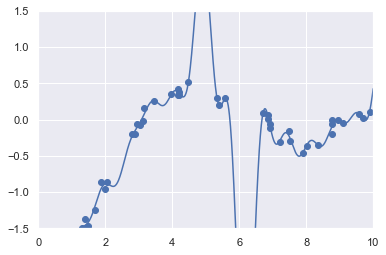

In [33]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

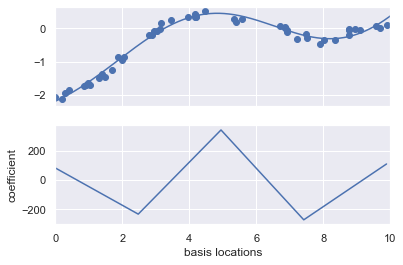

In [36]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis locations',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(5), LinearRegression())
basis_plot(model)

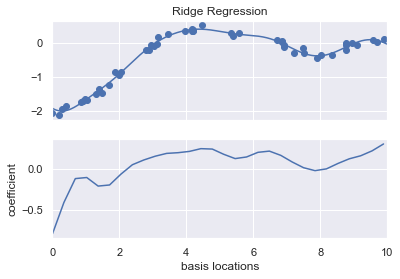

In [38]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

## Lasso Regression (L1 regularization)

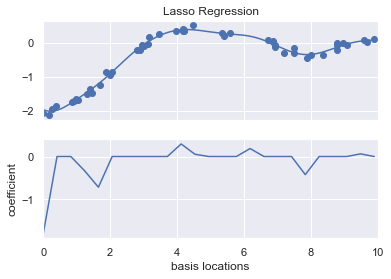

In [45]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(25), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Example : Predicting Bicycle Traffic

In [151]:
import pandas as pd
import datetime as dt
counts = pd.read_csv('/Users/anthonyesposito/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('/Users/anthonyesposito/Desktop/python_practice/Python_Practice/Basic_Coding/Numpy_Practice/PythonDataScienceHandbook-master/notebooks/data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [152]:
counts.head(24)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


In [153]:
daily = counts.resample('d').sum()
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0


In [154]:
daily['Total'] = daily['Fremont Bridge Total']
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,,
2012-10-03,7042.0,3520.0,3522.0,7042.0
2012-10-04,6950.0,3416.0,3534.0,6950.0
2012-10-05,6296.0,3116.0,3180.0,6296.0
2012-10-06,4012.0,2160.0,1852.0,4012.0
2012-10-07,4284.0,2382.0,1902.0,4284.0


In [155]:
daily = daily[['Total']]
daily.head()

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0


In [158]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [159]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

(8.0, 17.0)

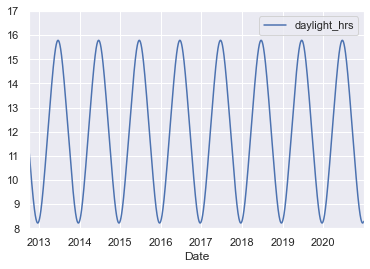

In [160]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    '''Compute the hours of daylight for the given date'''
    days = (date - dt.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [161]:
# temperatures are in 1/10 deg C convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [162]:
daily['annual'] = (daily.index - daily.index[0]).days / 365

In [163]:
weather['PRCP'].isnull()

DATE
2012-01-01    False
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
              ...  
2015-08-28    False
2015-08-29    False
2015-08-30    False
2015-08-31    False
2015-09-01    False
Name: PRCP, Length: 1340, dtype: bool

In [164]:
daily.isnull().query('PRCP == True')

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2015-09-02,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2015-09-03,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2015-09-04,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2015-09-05,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2015-09-06,False,False,False,False,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2020-12-28,False,False,False,False,False,False,False,False,False,False,True,True,True,False
2020-12-29,False,False,False,False,False,False,False,False,False,False,True,True,True,False


In [165]:
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 
                'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

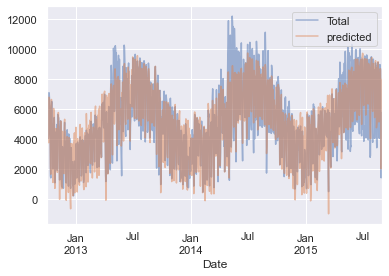

In [166]:
daily[['Total', 'predicted']].plot(alpha=0.5);

In [167]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             1009.765512
Tue             1220.467872
Wed             1185.347283
Thu              964.716230
Fri              355.960691
Sat            -2206.603421
Sun            -2267.134492
holiday        -2374.802762
daylight_hrs     257.703022
PRCP           -1329.669764
dry day         1095.397185
Temp (C)         130.325582
annual            53.885426
dtype: float64

In [140]:
daily['Total']

Date
2012-10-03    14084.0
2012-10-04    13900.0
2012-10-05    12592.0
2012-10-06     8024.0
2012-10-07     8568.0
               ...   
2015-08-28    10612.0
2015-08-29     2796.0
2015-08-30     4852.0
2015-08-31    11292.0
2015-09-01    11504.0
Freq: D, Name: Total, Length: 1064, dtype: float64

In [169]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
             for i in range(1000)], 0)

In [170]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon           1010.0  173.0
Tue           1220.0  166.0
Wed           1185.0  166.0
Thu            965.0  170.0
Fri            356.0  162.0
Sat          -2207.0  159.0
Sun          -2267.0  166.0
holiday      -2375.0  326.0
daylight_hrs   258.0   18.0
PRCP         -1330.0  125.0
dry day       1095.0   66.0
Temp (C)       130.0    7.0
annual          54.0   35.0
